convert multipolygon to none class

In [1]:
from paquo.projects import QuPathProject
from paquo.classes import QuPathPathClass
import numpy as np
import os
import xml.etree.ElementTree as ET
from xml.dom import minidom
import cv2
from matplotlib import pyplot as plt

In [2]:
# load qupath project
qppath = r"\\kukissd\Kyu_Sync\Research\Active\Aging_organized\svs\svs_back\qupath_v2\project.qpproj"
with QuPathProject(qppath, mode='r+') as qp:
    if not os.path.exists(qp.images[0].uri[7:]):
        if os.path.exists(r"\\motherserverdw\Kyu_Sync"):
            for image in qp.images:
                qp.update_image_paths(uri2uri={image.uri: image.uri.replace('kukissd','10.162.80.6')})
        elif os.path.exists(r"\\kukissd\Kyu_Sync"):
            for image in qp.images:
                qp.update_image_paths(uri2uri={image.uri: image.uri.replace('10.162.80.6','kukissd')})
        else:
            raise NameError('server is not accessible')
classes = qp.path_classes

In [7]:
types=[]
with QuPathProject(qppath, mode='r+') as qp:
    image = qp.images[0]
    annotations = image.hierarchy.annotations
    for annotation in annotations:
        if not annotation.path_class is None:
            poly = annotation.roi
            types.append(poly.type)
set(types)

{'Polygon'}

In [7]:
# label multipolygon with name "multi"
with QuPathProject(qppath, mode='r+') as qp:
    image = qp.images[0]
    annotations = image.hierarchy.annotations
    for annotation in annotations:
        if not annotation.path_class is None:
            poly = annotation.roi
            if poly.type=='MultiPolygon':
                print('multipolygon',annotation.path_class)
                annotation.name = 'multi'

multipolygon QuPathPathClass('spinosum')
multipolygon QuPathPathClass('inner corneum')
multipolygon QuPathPathClass('white')
multipolygon QuPathPathClass('outer corneum')
multipolygon QuPathPathClass('basale')
multipolygon QuPathPathClass('granulosum')
multipolygon QuPathPathClass('collagen')
multipolygon QuPathPathClass('basale')
multipolygon QuPathPathClass('granulosum')
multipolygon QuPathPathClass('outer corneum')
multipolygon QuPathPathClass('basale')
multipolygon QuPathPathClass('granulosum')
multipolygon QuPathPathClass('basale')
multipolygon QuPathPathClass('collagen')
multipolygon QuPathPathClass('spinosum')
multipolygon QuPathPathClass('basale')
multipolygon QuPathPathClass('collagen')
multipolygon QuPathPathClass('outer corneum')
multipolygon QuPathPathClass('spinosum')
multipolygon QuPathPathClass('basale')
multipolygon QuPathPathClass('white')
multipolygon QuPathPathClass('collagen')
multipolygon QuPathPathClass('spinosum')
multipolygon QuPathPathClass('inner corneum')
mul

In [40]:
# label multipolygon with class "none"
with QuPathProject(qppath, mode='r+') as qp:
    image = qp.images[0]
    annotations = image.hierarchy.annotations

    _updated = []
    for annotation in annotations:
        if not annotation.path_class is None:
            poly = annotation.roi
            if poly.type=='MultiPolygon':
                print('multipolygon',annotation.path_class)
                annotation.update_path_class(classes[0])
                _updated.append(annotation)
    image.hierarchy.annotations.update(_updated)
    assert image.is_changed()

multipolygon QuPathPathClass('spinosum')
multipolygon QuPathPathClass('inner corneum')
multipolygon QuPathPathClass('white')
multipolygon QuPathPathClass('outer corneum')
multipolygon QuPathPathClass('basale')
multipolygon QuPathPathClass('granulosum')
multipolygon QuPathPathClass('collagen')
multipolygon QuPathPathClass('basale')
multipolygon QuPathPathClass('granulosum')
multipolygon QuPathPathClass('outer corneum')
multipolygon QuPathPathClass('basale')
multipolygon QuPathPathClass('granulosum')
multipolygon QuPathPathClass('basale')
multipolygon QuPathPathClass('collagen')
multipolygon QuPathPathClass('spinosum')
multipolygon QuPathPathClass('basale')
multipolygon QuPathPathClass('collagen')
multipolygon QuPathPathClass('outer corneum')
multipolygon QuPathPathClass('spinosum')
multipolygon QuPathPathClass('basale')
multipolygon QuPathPathClass('white')
multipolygon QuPathPathClass('collagen')
multipolygon QuPathPathClass('spinosum')
multipolygon QuPathPathClass('inner corneum')
mul

In [5]:
# expand multipolygon slightly to make it polygon and update annotation
types=[]
with QuPathProject(qppath, mode='r+') as qp:
    image = qp.images[0]
    annotations = image.hierarchy.annotations
    _updated = []
    for annotation in annotations:
        if not annotation.path_class is None:
            poly = annotation.roi
            if poly.type=='MultiPolygon':
                print('multipolygon',annotation.path_class)
                while poly.type=='MultiPolygon':
                    poly = poly.buffer(1)
                    poly = poly.buffer(-1)
                types.append(poly.type)
                annotation.update_roi(poly)
                _updated.append(annotation)
    print('updating project')
    annotations.update(_updated)
    assert image.is_changed()

set(types)

multipolygon QuPathPathClass('spinosum')
multipolygon QuPathPathClass('inner corneum')
multipolygon QuPathPathClass('white')
multipolygon QuPathPathClass('outer corneum')
multipolygon QuPathPathClass('basale')
multipolygon QuPathPathClass('granulosum')
multipolygon QuPathPathClass('collagen')
multipolygon QuPathPathClass('basale')
multipolygon QuPathPathClass('granulosum')
multipolygon QuPathPathClass('outer corneum')
multipolygon QuPathPathClass('basale')
multipolygon QuPathPathClass('granulosum')
multipolygon QuPathPathClass('collagen')
multipolygon QuPathPathClass('spinosum')
multipolygon QuPathPathClass('basale')
multipolygon QuPathPathClass('collagen')
multipolygon QuPathPathClass('outer corneum')
multipolygon QuPathPathClass('spinosum')
multipolygon QuPathPathClass('basale')
multipolygon QuPathPathClass('spinosum')
multipolygon QuPathPathClass('inner corneum')
multipolygon QuPathPathClass('white')
multipolygon QuPathPathClass('inner corneum')
multipolygon QuPathPathClass('basale'

{'Polygon'}

In [27]:
poly.type

'MultiPolygon'

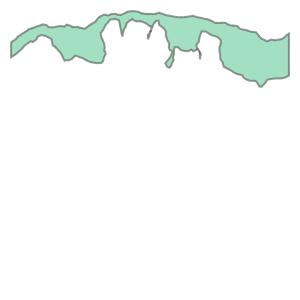

In [29]:
poly

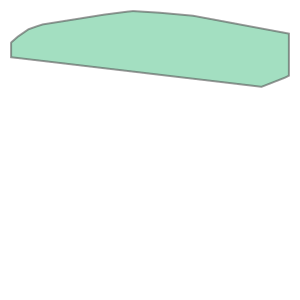

In [30]:
poly.convex_hull

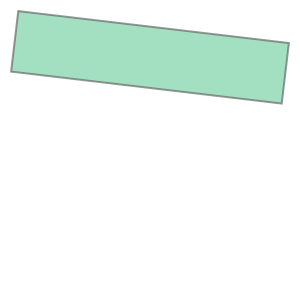

In [31]:
poly.minimum_rotated_rectangle

In [ ]:
poly.buffer(1)